# Tinkoff Scoring EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Импорт датасетов и начальный осмотр данных

In [2]:
app_info_df = pd.read_csv("application_info.csv")
dflt_flg_df = pd.read_csv("default_flg.csv")

In [3]:
dflt_flg_df

,id,default_flg
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
180811,180812,0
180812,180813,1
180813,180814,0
180814,180815,0


In [4]:
dflt_flg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180816 entries, 0 to 180815
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   id           180816 non-null  int64
 1   default_flg  180816 non-null  int64
dtypes: int64(2)
memory usage: 2.8 MB


In [5]:
app_info_df

,id,application_dt,sample_cd,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg
0,1,01JAN2014,train,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N
1,2,01JAN2014,train,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N
2,3,01JAN2014,train,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N
3,4,01JAN2014,train,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N
4,5,01JAN2014,train,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205291,205292,31MAR2015,test,UGR,F,24,N,N,0,1,-2.001592,0,80,1,2,60000,1,3,N
205292,205293,31MAR2015,test,SCH,F,48,N,N,2,1,-2.088683,3,60,1,3,25000,3,2,N
205293,205294,31MAR2015,test,GRD,F,33,Y,Y,0,1,-2.140081,2,80,1,2,100000,1,4,Y
205294,205295,31MAR2015,test,PGR,M,27,Y,Y,1,0,-1.552576,0,50,1,3,32500,1,3,Y


In [6]:
app_info_df.describe()

,id,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd
count,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000
mean,102648.500000,39.354566,0.277297,0.169701,-1.967120,2.015826,57.332340,1.602218,2.520210,42251.807610,1.725864,2.791657
std,59263.994769,11.451011,0.782794,0.375371,0.488055,2.138564,13.262627,0.520577,0.689453,45183.110679,1.115876,1.024393
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000
25%,51324.750000,30.000000,0.000000,0.000000,-2.313894,1.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000
50%,102648.500000,37.000000,0.000000,0.000000,-1.990599,2.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000
75%,153972.250000,48.000000,0.000000,0.000000,-1.641914,3.000000,70.000000,2.000000,3.000000,50000.000000,2.000000,4.000000
max,205296.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000


In [7]:
app_info_df.describe(include="O")

,application_dt,sample_cd,education_cd,gender_cd,car_own_flg,car_type_flg,Air_flg
count,205296,205296,204384,205296,205296,205296,205296
unique,333,3,5,2,2,2,2
top,18MAR2014,train,SCH,F,N,N,N
freq,1491,110148,100234,117400,139119,166471,172168


In [8]:
app_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205296 entries, 0 to 205295
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               205296 non-null  int64  
 1   application_dt   205296 non-null  object 
 2   sample_cd        205296 non-null  object 
 3   education_cd     204384 non-null  object 
 4   gender_cd        205296 non-null  object 
 5   age              205296 non-null  int64  
 6   car_own_flg      205296 non-null  object 
 7   car_type_flg     205296 non-null  object 
 8   appl_rej_cnt     205296 non-null  int64  
 9   good_work_flg    205296 non-null  int64  
 10  Score_bki        205296 non-null  float64
 11  out_request_cnt  205296 non-null  int64  
 12  region_rating    205296 non-null  int64  
 13  home_address_cd  205296 non-null  int64  
 14  work_address_cd  205296 non-null  int64  
 15  income           205296 non-null  int64  
 16  SNA              205296 non-null  int6

## Смотрим баланс классов

   value   count
0      0  159982
1      1   20834


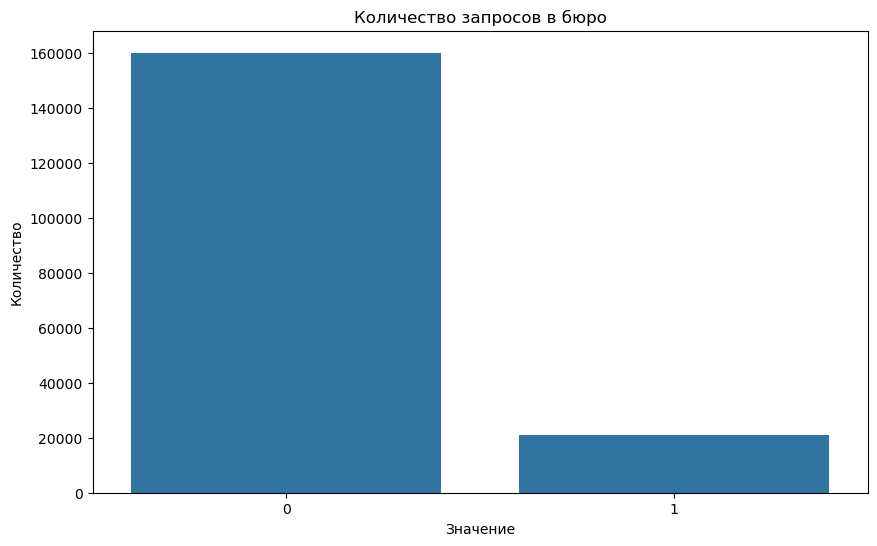

In [9]:
dflt_value_counts = dflt_flg_df[["default_flg"]].value_counts().sort_index().copy(deep=True)
dflt_count_df = dflt_value_counts.reset_index()
dflt_count_df.columns = ['value', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='value', y='count', data=dflt_count_df)
plt.title("Количество запросов в бюро")
plt.xlabel('Значение')
plt.ylabel('Количество')
print(dflt_count_df)

## Распределение возраста

<Axes: >

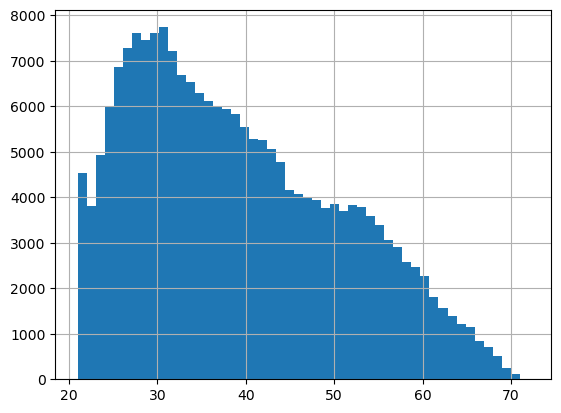

In [10]:
app_info_df.age.hist(bins=50)

## Распределение рейтинга регионов

<Axes: >

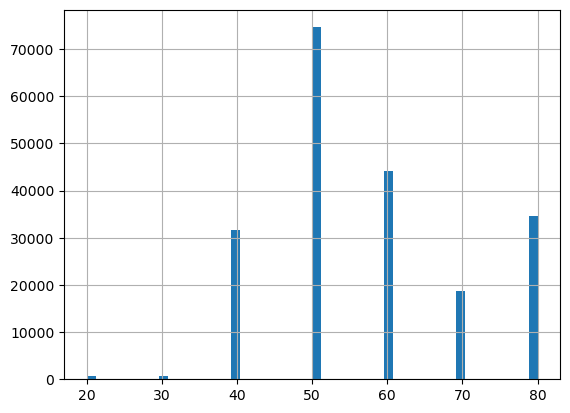

In [11]:
app_info_df.region_rating.hist(bins=50)

## Диаграмма количества отказанных прошлых заявок

    value   count
0       0  169284
1       1   24413
2       2    6954
3       3    2507
4       4    1085
5       5     471
6       6     284
7       7     113
8       8      71
9       9      40
10     10      26
11     11      11
12     12       8
13     13       8
14     14       5
15     15       2
16     16       4
17     18       3
18     19       1
19     20       1
20     21       1
21     22       1
22     24       1
23     30       1
24     33       1


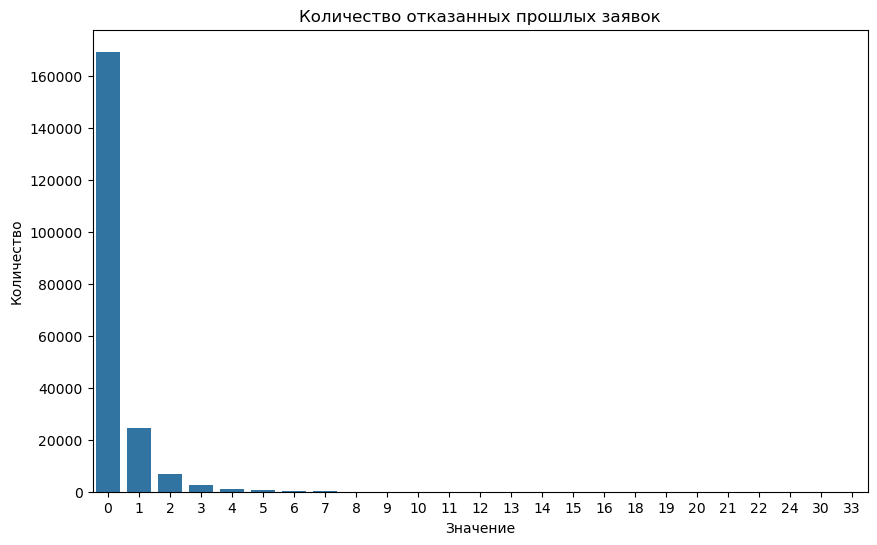

In [14]:
value_counts = app_info_df[["appl_rej_cnt"]].value_counts().sort_index().copy(deep=True)
count_df = value_counts.reset_index()
count_df.columns = ['value', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='value', y='count', data=count_df)
plt.title('Количество отказанных прошлых заявок')
plt.xlabel('Значение')
plt.ylabel('Количество')
print(count_df)

## Диаграмма наличия 'хорошей' работы

   value   count
0      0  170457
1      1   34839


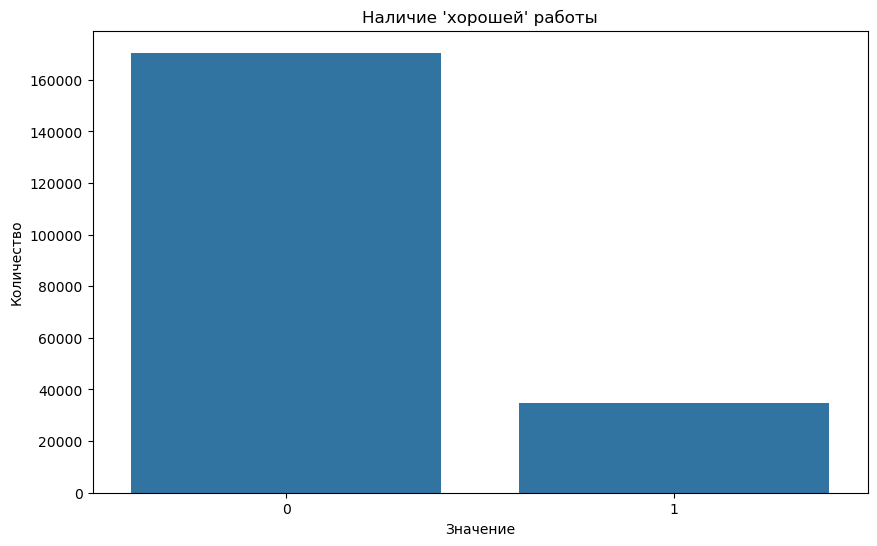

In [15]:
wrk_value_counts = app_info_df[["good_work_flg"]].value_counts().sort_index().copy(deep=True)
wrk_count_df = wrk_value_counts.reset_index()
wrk_count_df.columns = ['value', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='value', y='count', data=wrk_count_df)
plt.title("Наличие 'хорошей' работы")
plt.xlabel('Значение')
plt.ylabel('Количество')
print(wrk_count_df)

## Диаграмма количества запросов в бюро

    value  count
0       0  50621
1       1  50979
2       2  39915
3       3  26884
4       4  16149
5       5   9197
6       6   4730
7       7   2458
8       8   1283
9       9    835
10     10    633
11     11    449
12     12    355
13     13    246
14     14    191
15     15     90
16     16     70
17     17     37
18     18     36
19     19     32
20     20     15
21     21     19
22     22      8
23     23     14
24     24     12
25     25      5
26     26      5
27     27      5
28     28      5
29     29      3
30     32      4
31     33      2
32     34      1
33     36      1
34     40      2
35     41      1
36     45      1
37     46      1
38     47      1
39     53      1


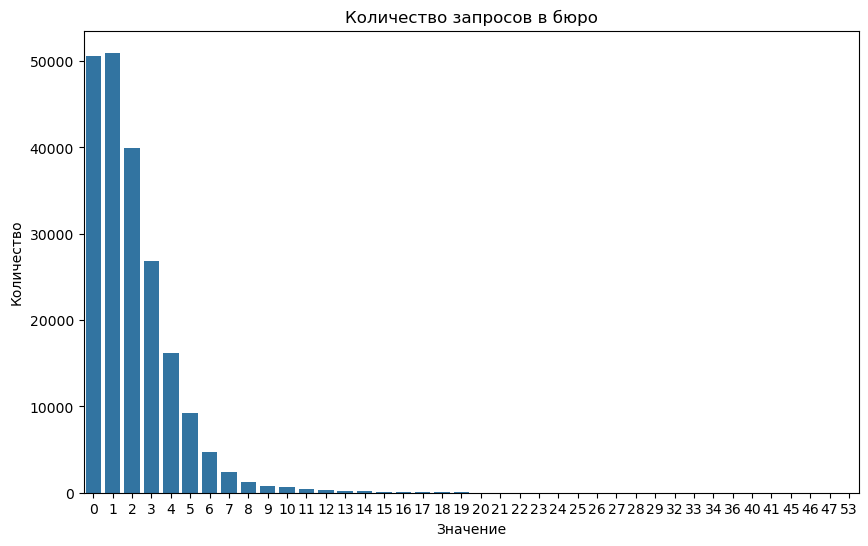

In [16]:
cb_value_counts = app_info_df[["out_request_cnt"]].value_counts().sort_index().copy(deep=True)
cb_count_df = cb_value_counts.reset_index()
cb_count_df.columns = ['value', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='value', y='count', data=cb_count_df)
plt.title("Количество запросов в бюро")
plt.xlabel('Значение')
plt.ylabel('Количество')
print(cb_count_df)

## Распределние дохода

<Axes: ylabel='Frequency'>

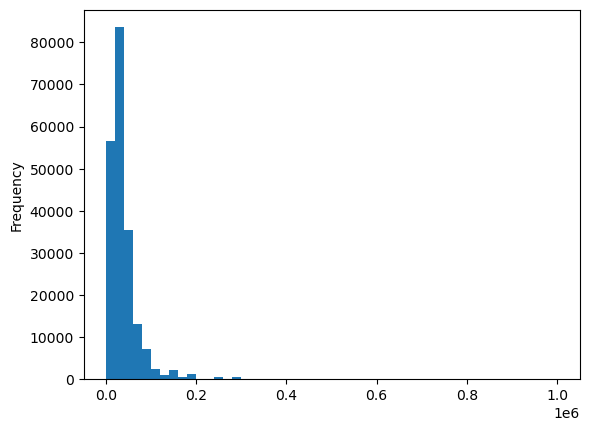

In [17]:
app_info_df.income.plot.hist(bins=50)

## Выбросы

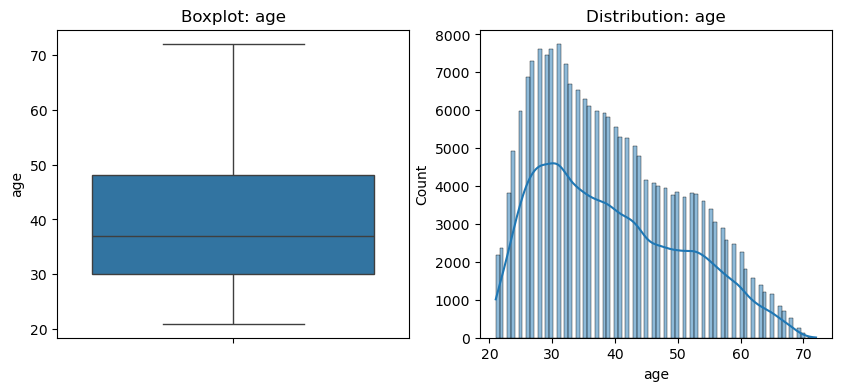

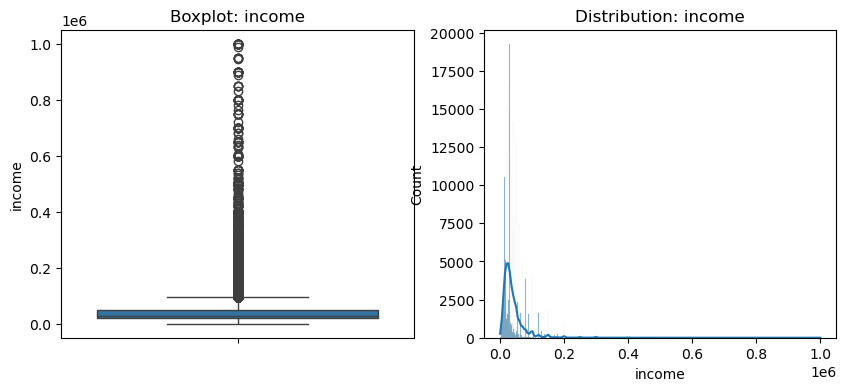

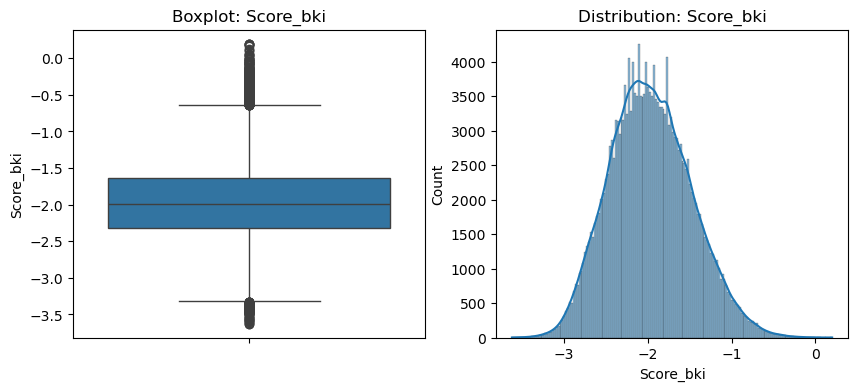

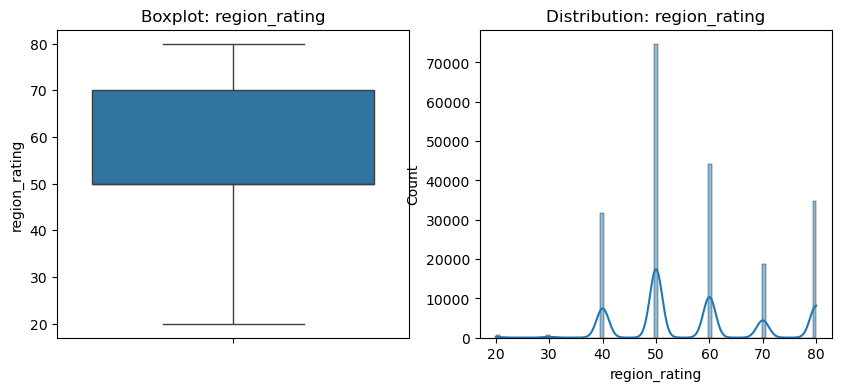

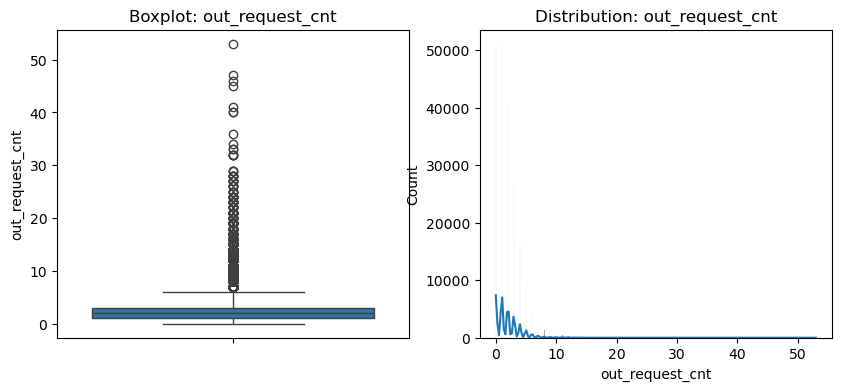

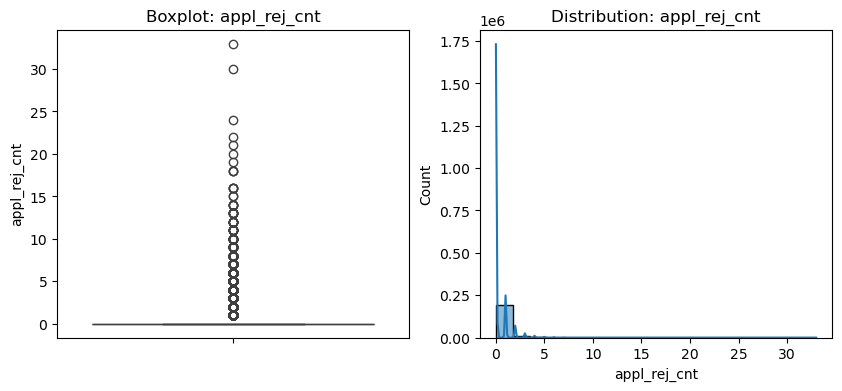

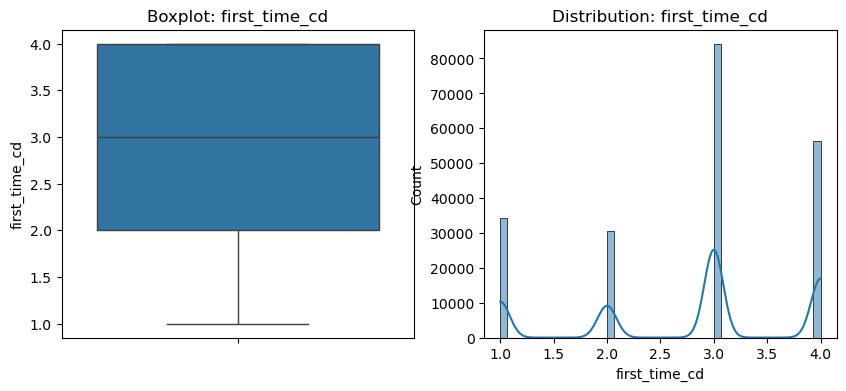

Отчет по выбросам:
           feature  outliers_count  outliers_pct          min             max  \
5     appl_rej_cnt           36012     17.541501     0.000000       33.000000   
1           income           13662      6.654781  1000.000000  1000000.000000   
4  out_request_cnt            6821      3.322520     0.000000       53.000000   
2        Score_bki            1086      0.528992    -3.624586        0.199773   
0              age               0      0.000000    21.000000       72.000000   
3    region_rating               0      0.000000    20.000000       80.000000   
6    first_time_cd               0      0.000000     1.000000        4.000000   

           mean           std  
5      0.277297      0.782794  
1  42251.807610  45183.110679  
4      2.015826      2.138564  
2     -1.967120      0.488055  
0     39.354566     11.451011  
3     57.332340     13.262627  
6      2.791657      1.024393  


In [18]:
def analyze_outliers(df, numeric_columns):
    """Анализ выбросов для числовых признаков"""
    outlier_stats = []
    
    for col in numeric_columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_pct = len(outliers) / len(df) * 100
            
            outlier_stats.append({
                'feature': col,
                'outliers_count': len(outliers),
                'outliers_pct': outlier_pct,
                'min': df[col].min(),
                'max': df[col].max(),
                'mean': df[col].mean(),
                'std': df[col].std()
            })
            
            # Визуализация
            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            sns.boxplot(y=df[col])
            plt.title(f'Boxplot: {col}')
            
            plt.subplot(1, 2, 2)
            sns.histplot(df[col], kde=True)
            plt.title(f'Distribution: {col}')
            plt.show()
    
    return pd.DataFrame(outlier_stats)

# Проверьте выбросы в числовых признаках
numeric_cols = ['age', 'income', 'Score_bki', 'region_rating', 
                'out_request_cnt', 'appl_rej_cnt', 'first_time_cd']
outlier_report = analyze_outliers(app_info_df, numeric_cols)
print("Отчет по выбросам:")
print(outlier_report.sort_values('outliers_pct', ascending=False))